# Challenge: Promotions

In this challenge, you'll develop codes to parse and analyze data returned from another API on Zalando such as [Promos homme (Men's Promotions)
](https://www.zalando.fr/promo-homme/) or [Promos femme (Women's Promotions)](https://www.zalando.fr/promo-femme/). The workflow is almost the same as in the guided lesson but you'll work with different data.

## Obtaining the link

Wrote your codes in the cell below to obtain the data from the API endpoint you choose. A recap of the workflow:

1. Examine the webpages and choose one that you want to work with.

1. Use Google Chrome's DevTools to inspect the XHR network requests. Find out the API endpoint that serves data to the webpage.

1. Test the API endpoint in the browser to verify its data.

1. Change the page number offset of the API URL to test if it's working.

In [11]:
# your code here
import json
import requests
import pandas as pd
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt

In [2]:
url='https://www.zalando.fr/api/catalog/articles?categories=promo-enfant&limit=84&offset=84&sort=sale'
# returns error
# used http://xkcd.com/{x}/info.0.json instead

## Reading the data

In the next cell, use Python to obtain data from the API endpoint you chose in the previous step. Workflow:

1. Import libraries.

1. Define the initial API endpoint URL.

1. Make request to obtain data of the 1st page. Flatten the data and store it in an empty object variable.

1. Find out the total page count in the 1st page data.

1. Use a FOR loop to make requests for the additional pages from 2 to page count. Append the data of each additional page to the flatterned data object.

1. Print and review the data you obtained.

In [3]:
listilla = [f"http://xkcd.com/{i}/info.0.json" for i in range(1,3000)]

In [4]:
# your code here
listin = []
for url in listilla:
    try:
        response = requests.get(url).json()
        listin.append(response)
    except:
        pass

In [5]:
df = pd.DataFrame(listin,columns=listin[0].keys())
df.head()

,month,num,link,year,news,safe_title,transcript,alt,img,title,day
0,1,1,,2006,,Barrel - Part 1,[[A boy sits in a barrel which is floating in ...,Don't we all.,https://imgs.xkcd.com/comics/barrel_cropped_(1...,Barrel - Part 1,1
1,1,2,,2006,,Petit Trees (sketch),[[Two trees are growing on opposite sides of a...,"'Petit' being a reference to Le Petit Prince, ...",https://imgs.xkcd.com/comics/tree_cropped_(1).jpg,Petit Trees (sketch),1
2,1,3,,2006,,Island (sketch),"[[A sketch of an Island]]\n{{Alt:Hello, island}}","Hello, island",https://imgs.xkcd.com/comics/island_color.jpg,Island (sketch),1
3,1,4,,2006,,Landscape (sketch),[[A sketch of a landscape with sun on the hori...,There's a river flowing through the ocean,https://imgs.xkcd.com/comics/landscape_cropped...,Landscape (sketch),1
4,1,5,,2006,,Blown apart,[[A black number 70 sees a red package.]]\n70:...,Blown into prime factors,https://imgs.xkcd.com/comics/blownapart_color.jpg,Blown apart,1


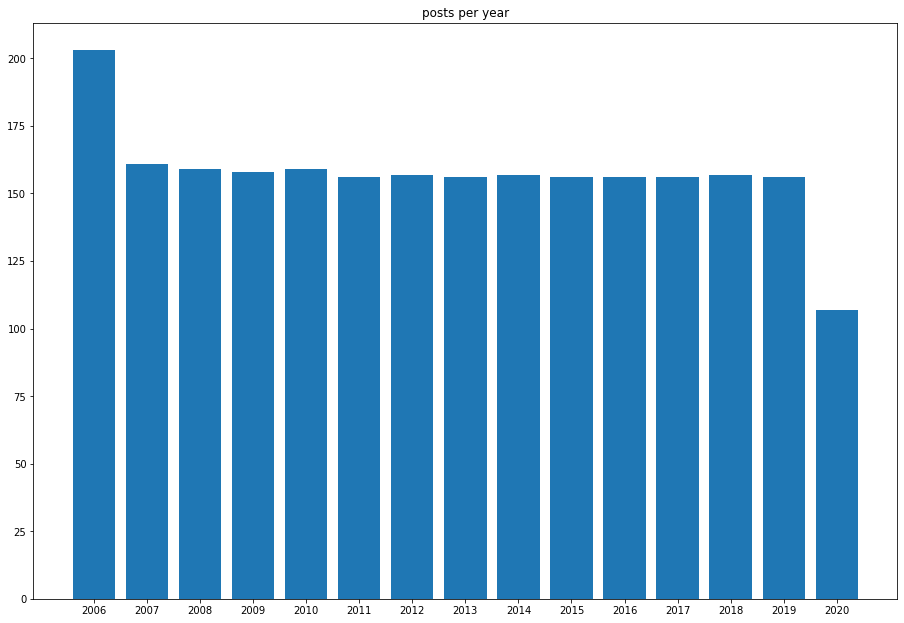

In [44]:
yrs = df.year.value_counts().sort_index()

fig = plt.figure(figsize=(12,8))
ax = fig.add_axes([0,0,1,1])
cols = yrs.index
students = yrs.values
ax.bar(cols,students)
plt.title("posts per year")
plt.show()

## Bonus

Extract the following information from the data:

* The trending brand.

* The product(s) with the highest discount.

* The sum of discounts of all goods (sum_discounted_prices divided by sum_original_prices).

In [45]:
# your code here